## 0. Import Libraries

In [2]:
import numpy as np
import xarray as xr

## 1. Open Data

### 1.1 Data Options

In [3]:
# change these
name_dt = 'cosmo' # cosmo or era5land
season = 'DJF' # DJF, MAM, JJA, SON
time_resample = 1 # options: 1, 3, 6 (resampling)

# path for resampling information
if time_resample != 1:
    path_resample = fr'{time_resample}hrsum'
else:
    path_resample = fr'{time_resample}hr'
    
# general data path
path_general = fr'/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/'

# variable name
name_variable = 'TOT_PREC'

# saving path
path_save = fr'data/{name_variable}/{name_dt}/'

# years
years = np.arange(1985, 2006, dtype=int)

In [4]:
# open data
path_dt = fr'{path_general}Tr011_MPI_RF_PR_{season}_{path_resample}_198501_200512.nc'

# chunk recommendation from chatGPT
dt = xr.open_dataset(path_dt, 
                     #chunks={'rlat':2,
                     #        'rlon':2
                     #        }
                    )[name_variable]

In [5]:
dt

<xarray.DataArray 'TOT_PREC' (time: 45480, rlat: 107, rlon: 175)>
[851613000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1985-01-01 ... 2005-12-31T23:00:00
    lon      (rlat, rlon) float32 ...
    lat      (rlat, rlon) float32 ...
  * rlon     (rlon) float32 -8.3 -8.19 -8.08 -7.97 ... 10.51 10.62 10.73 10.84
  * rlat     (rlat) float32 -6.2 -6.09 -5.98 -5.87 -5.76 ... 5.13 5.24 5.35 5.46
Attributes:
    standard_name:  precipitation_amount
    long_name:      total precipitation amount
    units:          kg m-2
    cell_methods:   time: sum

## 2. Intensity Indices

In [64]:
# groupby and find maximum (rx_xhr)
rx_xhr = dt.groupby('time.year').reduce(np.max, 
                                        dim='time', 
                                        keep_attrs=True
                                       )

# Add information about the computation to the dataset's attributes
rx_xhr.attrs['computation'] = 'grouped by year and took maximum over time dimension'
rx_xhr.attrs['indice_name'] = fr'rx{time_resample}hr'

In [65]:
rx_xhr.to_netcdf(fr"{path_save}{name_dt}_{season}_intensity_{rx_xhr.attrs['indice_name']}_198501_200512.nc")

## 3. Absolute Indices

In [20]:
p99_xhr  = dt.quantile(0.99,
               dim='time',
                )

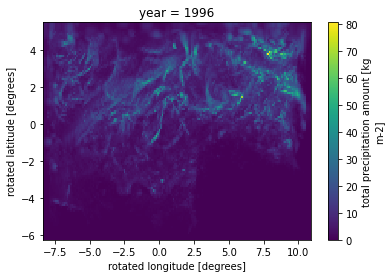

In [18]:
xr.open_dataset(fr'{path_save}{"cosmo_JJA_intensity_rx1hr_198501_200512.nc"}')[name_variable][-10].plot()

In [ ]:
kk = dt.where(dt>p99_xhr)#.count(dim='time')

In [ ]:
(49009,100,100)

In [ ]:
(1, 100,100)

In [ ]:
for year in years:
    
    Rxhr95p_xyear = dt.sel(time=str(year)).where(dt.sel(time=str(year))>p95_xhr)\
                      .groupby('time.year')\
                      .count(dim='time')
    
    # Add information about the computation to the dataset's attributes
    Rxhr95p.attrs['computation'] = 'calculated p95 grouped by year and count above 95p over time dimension'
    Rxhr95p.attrs['indice_name'] = fr'R{time_resample}hr95P'
    
    # save
    Rxhr95p.to_netcdf(fr"{path_save}{name_dt}_{season}_absolute_{Rxhr95p.attrs['indice_name']}_year{year}_198501_200512.nc")
    pri

In [9]:
# group data by year and count exceedances in time dimension
Rxhr95p = dt.where(dt>dt.quantile(0.95,
                       dim='time',
                       keep_attrs=True
                        )
                  )\
            .groupby('time.year')\
            .count(dim='time')

# Add information about the computation to the dataset's attributes
Rxhr95p.attrs['computation'] = 'calculated p95 grouped by year and count above 95p over time dimension'
Rxhr95p.attrs['indice_name'] = fr'R{time_resample}hr95P'

In [10]:
Rxhr95p.to_netcdf(fr"{path_save}{name_dt}_{season}_absolute_{Rxhr95p.attrs['indice_name']}_198501_200512.nc")


KeyboardInterrupt



In [5]:
import xarray as xr
xr.open_dataset(fr'/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/example_year.nc000001.nc')

<xarray.Dataset>
Dimensions:   (time: 1985, rlat: 107, rlon: 175)
Coordinates:
  * time      (time) datetime64[ns] 1985-12-24T17:00:00 ... 1986-12-17T09:00:00
    lon       (rlat, rlon) float32 ...
    lat       (rlat, rlon) float32 ...
  * rlon      (rlon) float32 -8.3 -8.19 -8.08 -7.97 ... 10.51 10.62 10.73 10.84
  * rlat      (rlat) float32 -6.2 -6.09 -5.98 -5.87 ... 5.13 5.24 5.35 5.46
Data variables:
    TOT_PREC  (time, rlat, rlon) float32 ...
Attributes: (12/13)
    CDI:                       Climate Data Interface version 1.9.10 (https:/...
    Conventions:               CF-1.4
    source:                    /home/yunal/cclm-sp-v3.1.1/src/cclm/cclm.exe}
    title:                     CCLM_v5.0_clm15 Simulation (0.11 Deg) with Med...
    experiment_id:             Tr0.11_RF
    realization:               1
    ...                        ...
    contact:                   Cemre Yuruk Sonuc (yurukc@itu.edu.tr)
    references:                http://www.clm-community.eu/
    creation_date:             2020-03-01 04:03:14
    nco_openmp_thread_number:  1
    history:                   Tue Dec 06 15:40:12 2022: cdo splitsel,1985 Tr...
    CDO:                       Climate Data Operators version 1.9.10 (https:/...